## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata,study_results, on="Mouse ID")

In [2]:
groupedData = combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"]

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugRegimenMean = round(groupedData.mean(),2)
drugRegimenMedian = round(groupedData.median(),2)
drugRegimenVariance = round(groupedData.var(),2)
drugRegimenStdDev = round(groupedData.std(),2)
drugRegimenSEM = round(groupedData.sem(),2)

summaryDf = pd.DataFrame({"Mean": drugRegimenMean, 
                          "Median": drugRegimenMedian, 
                          "Variance": drugRegimenVariance, 
                          "Std Dev": drugRegimenStdDev,"SEM": drugRegimenSEM})
summaryDf

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

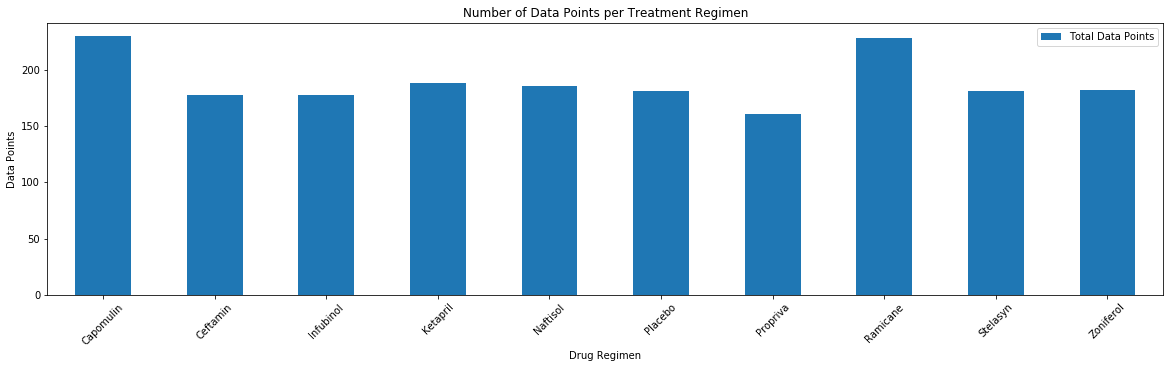

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
DataPoints = combinedData.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].count()
DataPoints = pd.DataFrame(DataPoints)
DataPointsReset = DataPoints.reset_index()
TotalDataPoints = DataPointsReset.groupby("Drug Regimen").sum()
TotalDataPoints = TotalDataPoints.rename(columns={"Tumor Volume (mm3)": "Total Data Points"})
TotalDataPoints = TotalDataPoints.reset_index()

barChart = TotalDataPoints.plot(kind="bar", figsize= (20,5))
barChart.set_xticklabels(TotalDataPoints["Drug Regimen"], rotation = 45)

plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

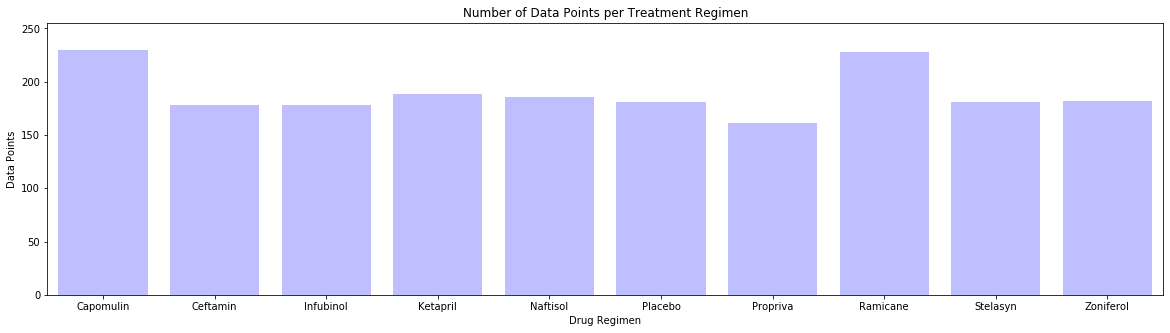

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = [regimen for regimen in TotalDataPoints["Drug Regimen"]]
x_axis = (np.arange(len(drug_regimen)))
y_axis = [points for points in TotalDataPoints["Total Data Points"]]

plt.figure(figsize = (20,5))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(y_axis)+25)

plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.bar(x_axis,y_axis, color = 'b', alpha = 0.25, align = 'center')

## Pie plots

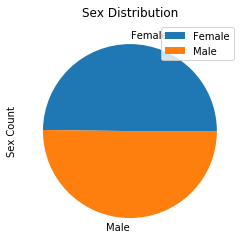

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexDf = combinedData.groupby("Sex")["Mouse ID"].nunique()
SexDf = pd.DataFrame(SexDf).rename(columns={"Mouse ID":"Sex Count"})
SexDf.plot(kind="pie", y = SexDf.keys()[0], title = "Sex Distribution")

In [7]:
SexDf = SexDf.reset_index()

Text(0.5, 1.0, 'Sex Distribution')

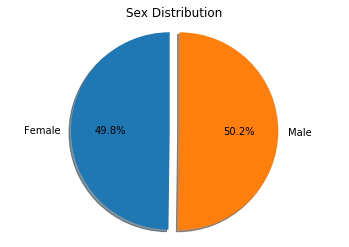

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [sex for sex in SexDf["Sex"]]
values = [value for value in SexDf["Sex Count"]]
explode = (0.1,0)
plt.pie(values, labels = labels, explode=explode, autopct="%1.1f%%", shadow = True, startangle = 90)

plt.axis("equal")
plt.title("Sex Distribution")

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
maxTime = pd.DataFrame(combinedData.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max())
FinalVol = pd.merge(maxTime,combinedData, on=("Mouse ID", "Timepoint"), how="left")


mostPromising = pd.DataFrame(FinalVol.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()).sort_values("Tumor Volume (mm3)")

#most promising treatments 
mostPromising = mostPromising.iloc[0:4,:]

FinalVol = FinalVol.loc[(FinalVol["Drug Regimen"]== "Ramicane") | 
                        (FinalVol["Drug Regimen"]== "Capomulin")| 
                        (FinalVol["Drug Regimen"]== "Propriva")|
                        (FinalVol["Drug Regimen"]== "Ceftamin")]

PromisingTreatments = FinalVol[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

Ramicane = PromisingTreatments.loc[PromisingTreatments["Drug Regimen"]== "Ramicane"]
Ramicane = round(Ramicane["Tumor Volume (mm3)"],2)


Capomulin = PromisingTreatments.loc[PromisingTreatments["Drug Regimen"]== "Capomulin"]
Capomulin = round(Capomulin["Tumor Volume (mm3)"],2)

Propriva = PromisingTreatments.loc[PromisingTreatments["Drug Regimen"]== "Propriva"]
Propriva = round(Propriva["Tumor Volume (mm3)"],2)

Ceftamin = PromisingTreatments.loc[PromisingTreatments["Drug Regimen"]== "Ceftamin"]
Ceftamin = round(Ceftamin["Tumor Volume (mm3)"],2)

In [10]:
#Ramicane
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.\n")

#Capomulin
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers for Capomulin.")
print(f"Values above {upper_bound} could be outliers for Capomulin.\n")

round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

#Propriva
quartiles = Propriva.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers for Propriva.")
print(f"Values above {upper_bound} could be outliers for Propriva.\n")

round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

#Ceftamin
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")

round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.

Values below 20.71 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.

Values below 28.94 could be outliers for Propriva.
Values above 82.74 could be outliers for Propriva.

Values below 25.35 could be outliers for Ceftamin.
Values above 87.67 could be outliers for Ceftamin.


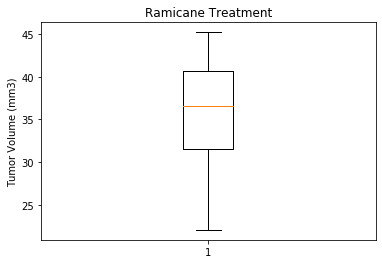

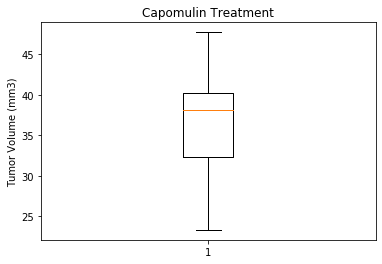

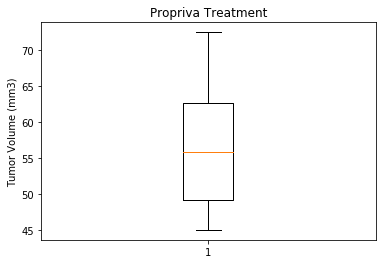

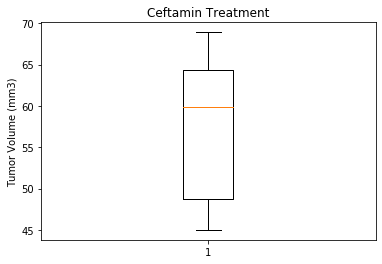

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
RamicaneBP = plt.boxplot(Ramicane)
plt.title("Ramicane Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

CapomulinBP = plt.boxplot(Capomulin)
plt.title("Capomulin Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

ProprivaBP = plt.boxplot(Propriva)
plt.title("Propriva Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

CeftaminBP = plt.boxplot(Ceftamin)
plt.title("Ceftamin Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

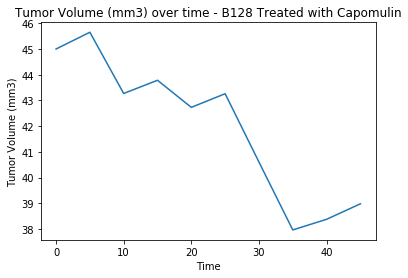

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin2 = combinedData.loc[combinedData["Drug Regimen"]== "Capomulin"]
CapoB128 = Capomulin2.loc[combinedData["Mouse ID"]== "b128"]
tumorVol = [x for x in CapoB128["Tumor Volume (mm3)"]]
time = [x for x in CapoB128["Timepoint"]]

plt.plot(time,tumorVol)
plt.title("Tumor Volume (mm3) over time - B128 Treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Avg Tumor Vol (mm3)')

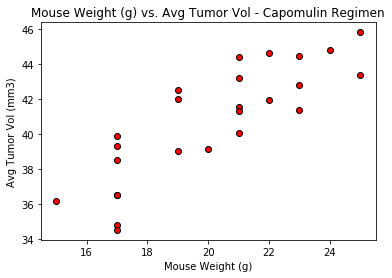

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin2 = combinedData.loc[combinedData["Drug Regimen"]== "Capomulin"]
Scatter = round(pd.DataFrame(Capomulin2.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()),2)
Scatter = Scatter.reset_index()
weight = [x for x in Scatter["Weight (g)"]]
vol = [x for x in Scatter["Tumor Volume (mm3)"]]

plt.scatter(weight,vol, marker="o", facecolor = "r", edgecolors="black")
plt.title("Mouse Weight (g) vs. Avg Tumor Vol - Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")


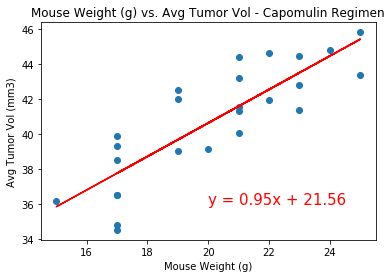

The r-squared is: 0.8418558779004007


In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = np.array(weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,vol)
plt.plot(weight,regress_values,"r")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title("Mouse Weight (g) vs. Avg Tumor Vol - Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")

plt.show()
print(f"The r-squared is: {rvalue}")